In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h3><b>SQL Server Data Extraction</b></h3>

In [6]:
from sqlalchemy import create_engine
import pandas as pd

server = 'DESKTOP-02PDET2\SQL' 
database = 'Banking_DB'

engine = create_engine(f"mssql+pyodbc://@{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server")

tables = ['users_data', 'transactions_data', 'cards_data']

dfs = {}

for table in tables:
    dfs[table] = pd.read_sql_table(table, engine)

engine.dispose()


<h3><b>Loading SQL Server Tables into Pandas DataFrames</b></h3>

In [8]:
users_df = dfs['users_data']
transactions_df = dfs['transactions_data']
cards_df = dfs['cards_data']

In [9]:
import pandas as pd

print(users_df.dtypes)

id                     int64
current_age            int64
retirement_age         int64
birth_year             int64
birth_month            int64
gender                object
address               object
latitude             float64
longitude            float64
per_capita_income    float64
yearly_income        float64
total_debt           float64
credit_score           int64
num_credit_cards       int64
dtype: object


In [10]:
# Structure Overview
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   float64
 10  yearly_income      2000 non-null   float64
 11  total_debt         2000 non-null   float64
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 218.9+ KB


In [11]:
users_df.head()

id  current_age  retirement_age  birth_year  birth_month  gender  \
0   0           33              69        1986            3    Male   
1   1           43              74        1976            4  Female   
2   2           48              64        1971            8    Male   
3   3           49              65        1970           12    Male   
4   4           54              72        1965            3  Female   

                       address   latitude   longitude  per_capita_income  \
0              858 Plum Avenue  43.590000  -70.330002            29237.0   
1               113 Burns Lane  30.440001  -87.180000            22247.0   
2           6035 Forest Avenue  40.840000  -73.870003            13461.0   
3               840 Elm Avenue  33.889999  -98.510002            13705.0   
4  6016 Little Creek Boulevard  47.610001 -122.300003            37485.0   

   yearly_income  total_debt  credit_score  num_credit_cards  
0        59613.0     36199.0           763                 4  
1        45360.0     14587.0           704                 3  
2        27447.0     80850.0           673                 5  
3        27943.0     18693.0           681                 4  
4        76431.0    115362.0           716                 5

In [12]:
transactions_df.head()

id       date  client_id  card_id  amount           use_chip  \
0  7475327 2010-01-01       1556     2972  -77.00  Swipe Transaction   
1  7475328 2010-01-01        561     4575   14.57  Swipe Transaction   
2  7475329 2010-01-01       1129      102   80.00  Swipe Transaction   
3  7475331 2010-01-01        430     2860  200.00  Swipe Transaction   
4  7475332 2010-01-01        848     3915   46.41  Swipe Transaction   

   merchant_id merchant_city merchant_state      zip   mcc errors  
0        59935        Beulah             ND  58523.0  5499   None  
1        67570    Bettendorf             IA  52722.0  5311   None  
2        27092         Vista             CA  92084.0  4829   None  
3        27092   Crown Point             IN  46307.0  4829   None  
4        13051       Harwood             MD  20776.0  5813   None

In [13]:
cards_df.head()

id  client_id  card_brand card_type       card_number  expires  cvv  \
0   0       1362        Amex    Credit   393314135668401  04/2024  866   
1   1        550  Mastercard    Credit  5278231764792292  06/2024  396   
2   2        556  Mastercard     Debit  5889825928297675  09/2021  422   
3   3       1937        Visa    Credit  4289888672554714  04/2020  736   
4   4       1981  Mastercard     Debit  5433366978583845  03/2024  530   

   has_chip  num_cards_issued  credit_limit acct_open_date  \
0      True                 2       33900.0        01/1991   
1      True                 1       11600.0        01/1994   
2      True                 1       19948.0        01/1995   
3      True                 2       16400.0        01/1995   
4      True                 2       19439.0        01/1997   

   year_pin_last_changed card_on_dark_web  
0                   2014               No  
1                   2013               No  
2                   2011               No  
3                   2015               No  
4                   2007               No

<h4><b>Load MCC Codes JSON & Merge into Transactions</b></h4>

In [15]:
transactions_df['mcc'] = transactions_df['mcc'].astype(str).str.strip()

In [16]:
import json
# Load MCC codes JSON
with open('C:/Users/dell/Downloads/Financial Project/Dataset/mcc_codes.json', 'r') as f:
    mcc_dict = json.load(f)

# Map MCC descriptions
transactions_df['mcc_description'] = transactions_df['mcc'].map(mcc_dict)

transactions_df.to_csv("transactions_with_mcc.csv", index=False)
transactions_df.head()

id       date  client_id  card_id  amount           use_chip  \
0  7475327 2010-01-01       1556     2972  -77.00  Swipe Transaction   
1  7475328 2010-01-01        561     4575   14.57  Swipe Transaction   
2  7475329 2010-01-01       1129      102   80.00  Swipe Transaction   
3  7475331 2010-01-01        430     2860  200.00  Swipe Transaction   
4  7475332 2010-01-01        848     3915   46.41  Swipe Transaction   

   merchant_id merchant_city merchant_state      zip   mcc errors  \
0        59935        Beulah             ND  58523.0  5499   None   
1        67570    Bettendorf             IA  52722.0  5311   None   
2        27092         Vista             CA  92084.0  4829   None   
3        27092   Crown Point             IN  46307.0  4829   None   
4        13051       Harwood             MD  20776.0  5813   None   

                         mcc_description  
0              Miscellaneous Food Stores  
1                      Department Stores  
2                         Money Transfer  
3                         Money Transfer  
4  Drinking Places (Alcoholic Beverages)

In [17]:
# for surely
print("Sample MCC in dataframe:", transactions_df['mcc'].unique()[:10])
print("Sample MCC in JSON:", list(mcc_dict.keys())[:10])
missing_mcc = transactions_df[transactions_df['mcc_description'].isna()]['mcc'].unique()
print("MCC codes not found in JSON:", missing_mcc[:20])


Sample MCC in dataframe: ['5499' '5311' '4829' '5813' '5942' '4784' '7801' '5411' '4121' '5541']
Sample MCC in JSON: ['5812', '5541', '7996', '5411', '4784', '4900', '5942', '5814', '4829', '5311']
MCC codes not found in JSON: []


<h4><b>Load fraud labels JSON & Merge into Transactions</b></h4>

In [19]:
with open('C:/Users/dell/Downloads/Financial Project/Dataset/train_fraud_labels.json', 'r') as f:
    data = json.load(f)

# Extract the "target" dictionary
fraud_dict = data["target"]

# Convert to DataFrame
fraud_df = pd.DataFrame(list(fraud_dict.items()), columns=['id', 'fraud_label'])

# Convert id to int and add numeric fraud flag
fraud_df['id'] = fraud_df['id'].astype(int)
transactions_df['id'] = transactions_df['id'].astype(int)

# Save to CSV
fraud_df.to_csv("fraud_labels.csv", index=False)

# Merge with transactions data on 'id'
transactions_df = transactions_df.merge(fraud_df, on='id', how='left')
transactions_df.head()

id       date  client_id  card_id  amount           use_chip  \
0  7475327 2010-01-01       1556     2972  -77.00  Swipe Transaction   
1  7475328 2010-01-01        561     4575   14.57  Swipe Transaction   
2  7475329 2010-01-01       1129      102   80.00  Swipe Transaction   
3  7475331 2010-01-01        430     2860  200.00  Swipe Transaction   
4  7475332 2010-01-01        848     3915   46.41  Swipe Transaction   

   merchant_id merchant_city merchant_state      zip   mcc errors  \
0        59935        Beulah             ND  58523.0  5499   None   
1        67570    Bettendorf             IA  52722.0  5311   None   
2        27092         Vista             CA  92084.0  4829   None   
3        27092   Crown Point             IN  46307.0  4829   None   
4        13051       Harwood             MD  20776.0  5813   None   

                         mcc_description fraud_label  
0              Miscellaneous Food Stores          No  
1                      Department Stores          No  
2                         Money Transfer          No  
3                         Money Transfer         NaN  
4  Drinking Places (Alcoholic Beverages)          No

<h3><b>Data Overview<b></h3>

<h4><b>1. Users Data</b></h4>

In [22]:
# Structure Overview
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   float64
 10  yearly_income      2000 non-null   float64
 11  total_debt         2000 non-null   float64
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 218.9+ KB


In [23]:
# Descriptive Statistics
users_df.describe()

id  current_age  retirement_age   birth_year  birth_month  \
count  2000.000000  2000.000000     2000.000000  2000.000000  2000.000000   
mean    999.500000    45.391500       66.237500  1973.803000     6.439000   
std     577.494589    18.414092        3.628867    18.421234     3.565338   
min       0.000000    18.000000       50.000000  1918.000000     1.000000   
25%     499.750000    30.000000       65.000000  1961.000000     3.000000   
50%     999.500000    44.000000       66.000000  1975.000000     7.000000   
75%    1499.250000    58.000000       68.000000  1989.000000    10.000000   
max    1999.000000   101.000000       79.000000  2002.000000    12.000000   

          latitude    longitude  per_capita_income  yearly_income  \
count  2000.000000  2000.000000        2000.000000    2000.000000   
mean     37.389225   -91.554765       23141.928000   45715.882000   
std       5.114324    16.283293       11324.137358   22992.615456   
min      20.879999  -159.410004           0.000000       1.000000   
25%      33.837501   -97.395000       16824.500000   32818.500000   
50%      38.250000   -86.440002       20581.000000   40744.500000   
75%      41.200001   -80.129997       26286.000000   52698.500000   
max      61.200001   -68.669998      163145.000000  307018.000000   

          total_debt  credit_score  num_credit_cards  
count    2000.000000   2000.000000       2000.000000  
mean    63709.694000    709.734500          3.073000  
std     52254.453421     67.221949          1.637379  
min         0.000000    480.000000          1.000000  
25%     23986.750000    681.000000          2.000000  
50%     58251.000000    711.500000          3.000000  
75%     89070.500000    753.000000          4.000000  
max    516263.000000    850.000000          9.000000

In [24]:
# Check Null Values
users_df.isna().sum()

id                   0
current_age          0
retirement_age       0
birth_year           0
birth_month          0
gender               0
address              0
latitude             0
longitude            0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
dtype: int64

In [25]:
# Check Duplicates
users_df.duplicated().sum()

0

In [26]:
# Summary of Object columns
object_cols = users_df.select_dtypes(include='object')

summary = pd.DataFrame({
    'Unique Count': object_cols.nunique(),
    'Sample Values': object_cols.apply(lambda col: col.dropna().unique()[:5])
}).sort_values(by='Unique Count')

summary

Unique Count                                      Sample Values
gender              2                                     [Male, Female]
address          1999  [858 Plum Avenue, 113 Burns Lane, 6035 Forest ...

<h4><b>2. Transactions Data</b></h4>

In [28]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   id               1048575 non-null  int32         
 1   date             1048575 non-null  datetime64[ns]
 2   client_id        1048575 non-null  int64         
 3   card_id          1048575 non-null  int64         
 4   amount           1047838 non-null  float64       
 5   use_chip         1048575 non-null  object        
 6   merchant_id      1048575 non-null  int64         
 7   merchant_city    1048575 non-null  object        
 8   merchant_state   934308 non-null   object        
 9   zip              928142 non-null   float64       
 10  mcc              1048575 non-null  object        
 11  errors           16437 non-null    object        
 12  mcc_description  1048575 non-null  object        
 13  fraud_label      702540 non-null   object        
dtypes:

In [29]:
transactions_df.describe()

id                           date     client_id  \
count  1.048575e+06                        1048575  1.048575e+06   
mean   8.103260e+06  2010-06-05 19:02:49.749231872  1.031586e+03   
min    7.475327e+06            2010-01-01 00:00:00  0.000000e+00   
25%    7.788670e+06            2010-03-21 00:00:00  5.150000e+02   
50%    8.103005e+06            2010-06-07 00:00:00  1.077000e+03   
75%    8.417478e+06            2010-08-22 00:00:00  1.534000e+03   
max    8.733395e+06            2010-11-06 00:00:00  1.998000e+03   
std    3.630625e+05                            NaN  5.825153e+02   

            card_id        amount   merchant_id            zip  
count  1.048575e+06  1.047838e+06  1.048575e+06  928142.000000  
mean   3.373852e+03  4.282771e+01  4.780237e+04   51609.875193  
min    0.000000e+00 -5.000000e+02  2.000000e+00    1012.000000  
25%    2.240000e+03  9.020000e+00  2.588700e+04   28645.000000  
50%    3.434000e+03  2.951000e+01  4.628400e+04   48036.000000  
75%    4.722000e+03  6.514000e+01  6.757000e+04   78130.000000  
max    6.021000e+03  9.999400e+02  1.003410e+05   99840.000000  
std    1.681177e+03  7.627982e+01  2.576360e+04   29404.439503

In [30]:
transactions_df.isnull().sum()

id                       0
date                     0
client_id                0
card_id                  0
amount                 737
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state      114267
zip                 120433
mcc                      0
errors             1032138
mcc_description          0
fraud_label         346035
dtype: int64

In [31]:
transactions_df.duplicated().sum()

0

In [32]:
transactions_df['errors'].unique()

array([None, 'Technical Glitch', 'Bad Expiration', 'Bad Card Number',
       'Insufficient Balance', 'Bad PIN', 'Bad CVV', 'Bad Zipcode',
       'Insufficient Balance,Technical Glitch',
       'Bad PIN,Insufficient Balance', 'Bad PIN,Technical Glitch',
       'Bad Expiration,Technical Glitch',
       'Bad Card Number,Bad Expiration',
       'Bad Card Number,Insufficient Balance',
       'Bad Expiration,Insufficient Balance', 'Bad Card Number,Bad CVV',
       'Bad CVV,Technical Glitch', 'Bad Expiration,Bad CVV',
       'Bad CVV,Insufficient Balance'], dtype=object)

In [33]:
# Count empty strings
empty_count = (transactions_df['errors'] == '').sum()
print("Empty strings:", empty_count)

# Count whitespace-only values
space_count = (transactions_df['errors'].str.strip() == '').sum()
print("Whitespace only:", space_count)

# Count 'NULL' strings
null_str_count = (transactions_df['errors'] == 'NULL').sum()
print("NULL strings:", null_str_count)

Empty strings: 0
Whitespace only: 0
NULL strings: 0


In [34]:
# Summary of Object columns
object_cols = transactions_df.select_dtypes(include='object')

summary = pd.DataFrame({
    'Unique Count': object_cols.nunique(),
    'Sample Values': object_cols.apply(lambda col: col.dropna().unique()[:5])
}).sort_values(by='Unique Count')

summary

Unique Count  \
use_chip                    2   
fraud_label                 2   
errors                     18   
mcc_description           108   
mcc                       109   
merchant_state            120   
merchant_city            7004   

                                                     Sample Values  
use_chip                   [Swipe Transaction, Online Transaction]  
fraud_label                                              [No, Yes]  
errors           [Technical Glitch, Bad Expiration, Bad Card Nu...  
mcc_description  [Miscellaneous Food Stores, Department Stores,...  
mcc                                 [5499, 5311, 4829, 5813, 5942]  
merchant_state                                [ND, IA, CA, IN, MD]  
merchant_city    [Beulah, Bettendorf, Vista, Crown Point, Harwood]

In [35]:
transactions_df['mcc_description'].isna().sum()

0

<h4><b>3. Cards Data</b></h4>

In [37]:
cards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6146 non-null   int64  
 1   client_id              6146 non-null   int64  
 2   card_brand             6146 non-null   object 
 3   card_type              6146 non-null   object 
 4   card_number            6146 non-null   int64  
 5   expires                6146 non-null   object 
 6   cvv                    6146 non-null   int64  
 7   has_chip               6146 non-null   bool   
 8   num_cards_issued       6146 non-null   int64  
 9   credit_limit           6146 non-null   float64
 10  acct_open_date         6146 non-null   object 
 11  year_pin_last_changed  6146 non-null   int64  
 12  card_on_dark_web       6146 non-null   object 
dtypes: bool(1), float64(1), int64(6), object(5)
memory usage: 582.3+ KB


In [38]:
cards_df.describe()

id    client_id   card_number          cvv  num_cards_issued  \
count  6146.000000  6146.000000  6.146000e+03  6146.000000       6146.000000   
mean   3072.500000   994.939636  4.820426e+15   506.220794          1.503091   
std    1774.341709   578.614626  1.328582e+15   289.431123          0.519191   
min       0.000000     0.000000  3.001055e+14     0.000000          1.000000   
25%    1536.250000   492.250000  4.486365e+15   257.000000          1.000000   
50%    3072.500000   992.000000  5.108957e+15   516.500000          1.000000   
75%    4608.750000  1495.000000  5.585237e+15   756.000000          2.000000   
max    6145.000000  1999.000000  6.997197e+15   999.000000          3.000000   

        credit_limit  year_pin_last_changed  
count    6146.000000            6146.000000  
mean    14347.493980            2013.436707  
std     12014.463884               4.270699  
min         0.000000            2002.000000  
25%      7042.750000            2010.000000  
50%     12592.500000            2013.000000  
75%     19156.500000            2017.000000  
max    151223.000000            2020.000000

In [39]:
cards_df.isna().sum()

id                       0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
dtype: int64

In [40]:
cards_df.duplicated().sum()

0

In [41]:
# Summary of Object columns
object_cols = cards_df.select_dtypes(include='object')

summary = pd.DataFrame({
    'Unique Count': object_cols.nunique(),
    'Sample Values': object_cols.apply(lambda col: col.dropna().unique()[:5])
}).sort_values(by='Unique Count')

summary

Unique Count                                  Sample Values
card_on_dark_web             1                                           [No]
card_type                    3               [Credit, Debit, Debit (Prepaid)]
card_brand                   4             [Amex, Mastercard, Visa, Discover]
expires                    259  [04/2024, 06/2024, 09/2021, 04/2020, 03/2024]
acct_open_date             303  [01/1991, 01/1994, 01/1995, 01/1997, 01/1998]

<h3><b>Data Cleaning</b></h3>

<h4><b>1. Users Data<b></h4>

In [44]:
users_df.drop(['birth_year', 'birth_month', 'address'], axis=1, inplace=True)

<h4><b>2. Transactions Data<b></h4>

In [46]:
# Drop Duplicates
transactions_df.drop_duplicates(inplace=True)

In [47]:
# Date from Object to Date/time 
transactions_df['date'] = pd.to_datetime(transactions_df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [48]:
# Amount Column from Object into Float 
transactions_df['amount'] = (
    transactions_df['amount']
    .astype(str)                     
    .str.replace('$', '', regex=False)
)

transactions_df['amount'] = pd.to_numeric(transactions_df['amount'], errors='coerce')


In [49]:
print(transactions_df['amount'].head(10))
print(transactions_df['amount'].dtype)


0    -77.00
1     14.57
2     80.00
3    200.00
4     46.41
5      4.81
6     77.00
7     26.46
8    261.58
9     10.74
Name: amount, dtype: float64
float64


In [50]:
# Errors: Replace empty strings with NaN
transactions_df['errors'] = transactions_df['errors'].replace('', np.nan)

In [51]:
# Errors: Remove quotes and strip spaces
transactions_df['errors'] = transactions_df['errors'].str.replace('"', '', regex=False).str.strip()
transactions_df['errors'].value_counts(dropna=False)

errors
None                                     1032138
Insufficient Balance                       10199
Bad PIN                                     2532
Technical Glitch                            2063
Bad Card Number                              561
Bad CVV                                      488
Bad Expiration                               429
Bad Zipcode                                   87
Bad PIN,Insufficient Balance                  24
Insufficient Balance,Technical Glitch         20
Bad Card Number,Insufficient Balance          10
Bad PIN,Technical Glitch                       9
Bad Expiration,Technical Glitch                3
Bad Card Number,Bad CVV                        3
Bad Card Number,Bad Expiration                 2
Bad Expiration,Insufficient Balance            2
Bad CVV,Technical Glitch                       2
Bad Expiration,Bad CVV                         2
Bad CVV,Insufficient Balance                   1
Name: count, dtype: int64

In [52]:
error_map = {
    'Bad PIN': 'Authentication Error',
    'Bad CVV': 'Authentication Error',
    'Bad Card Number': 'Card Info Error',
    'Bad Expiration': 'Card Info Error',
    'Bad Zipcode': 'Card Info Error',
    'Insufficient Balance': 'Balance Error',
    'Technical Glitch': 'System Error',
    '': 'No Error'
}

In [53]:
# Convert everything to string first
transactions_df['errors'] = transactions_df['errors'].astype(str)

# Remove quotes and extra spaces
transactions_df['errors'] = transactions_df['errors'].str.replace('"', '').str.strip()

# Replace empty strings or 'nan' with 'No Error'
transactions_df['errors'] = transactions_df['errors'].replace(['', 'nan'], 'No Error')

# Split multiple errors into list
transactions_df['errors_list'] = transactions_df['errors'].str.split(',')
transactions_df['errors_list'] = transactions_df['errors_list'].apply(lambda x: [e.strip() for e in x])

In [54]:
# Explode so each error has its own row
errors_exploded = transactions_df.explode('errors_list')

# Map to broad category
errors_exploded['error_category'] = errors_exploded['errors_list'].map(error_map)

In [55]:
transactions_df['errors_list'].value_counts()

errors_list
[None]                                      1032138
[Insufficient Balance]                        10199
[Bad PIN]                                      2532
[Technical Glitch]                             2063
[Bad Card Number]                               561
[Bad CVV]                                       488
[Bad Expiration]                                429
[Bad Zipcode]                                    87
[Bad PIN, Insufficient Balance]                  24
[Insufficient Balance, Technical Glitch]         20
[Bad Card Number, Insufficient Balance]          10
[Bad PIN, Technical Glitch]                       9
[Bad Expiration, Technical Glitch]                3
[Bad Card Number, Bad CVV]                        3
[Bad Card Number, Bad Expiration]                 2
[Bad Expiration, Insufficient Balance]            2
[Bad CVV, Technical Glitch]                       2
[Bad Expiration, Bad CVV]                         2
[Bad CVV, Insufficient Balance]                   1


In [56]:
transactions_df['merchant_id'] = pd.to_numeric(transactions_df['merchant_id'], errors='coerce')

In [57]:
# cleaning the mcc description column
broad_category_map = {
    # Food & Beverage
    'Food & Beverage': [
        'Miscellaneous Food Stores', 'Grocery Stores, Supermarkets',
        'Fast Food Restaurants', 'Eating Places and Restaurants',
        'Drinking Places (Alcoholic Beverages)',
        'Package Stores, Beer, Wine, Liquor'
    ],
    # Transportation
    'Transportation': [
        'Tolls and Bridge Fees', 'Taxicabs and Limousines', 'Bus Lines',
        'Passenger Railways', 'Railroad Passenger Transport', 'Motor Freight Carriers and Trucking',
        'Airlines', 'Cruise Lines', 'Local and Suburban Commuter Transportation', 'Travel Agencies'
    ],
    # Retail Stores
    'Retail Stores': [
        'Department Stores', 'Book Stores', 'Electronics Stores', 'Discount Stores',
        'Wholesale Clubs', 'Family Clothing Stores', 'Shoe Stores', 'Leather Goods',
        'Sporting Goods Stores', 'Household Appliance Stores', "Women's Ready-To-Wear Stores",
        'Furniture, Home Furnishings, and Equipment Stores', 'Cosmetic Stores',
        'Gift, Card, Novelty Stores', 'Industrial Equipment and Supplies'
    ],
    # Professional Services
    'Professional Services': [
        'Legal Services and Attorneys', 'Accounting, Auditing, and Bookkeeping Services',
        'Tax Preparation Services', 'Insurance Sales, Underwriting', 'Detective Agencies, Security Services'
    ],
    # Health & Medical
    'Health & Medical': [
        'Doctors, Physicians', 'Dentists and Orthodontists', 'Hospitals', 'Podiatrists',
        'Optometrists, Optical Goods and Eyeglasses', 'Chiropractors', 'Medical Services'
    ],
    # Utilities & Telecom
    'Utilities & Telecom': [
        'Utilities - Electric, Gas, Water, Sanitary', 'Telecommunication Services',
        'Cable, Satellite, and Other Pay Television Services', 'Computer Network Services'
    ],
    # Entertainment
    'Entertainment': [
        'Motion Picture Theaters', 'Amusement Parks, Carnivals, Circuses',
        'Betting (including Lottery Tickets, Casinos)', 'Recreational Sports, Clubs',
        'Athletic Fields, Commercial Sports', 'Theatrical Producers', 'Music Stores - Musical Instruments'
    ]
}

# Function to map mcc_description to broad category
def map_broad_category(x):
    for broad_cat, cat_list in broad_category_map.items():
        if x in cat_list:
            return broad_cat
    return 'Other'  # default if not found

# Overwrite your existing mcc_description column
transactions_df['mcc_description'] = transactions_df['mcc_description'].apply(map_broad_category)

# Check results
print(transactions_df['mcc_description'].value_counts())

mcc_description
Food & Beverage          388279
Other                    342178
Retail Stores            135312
Transportation           104996
Utilities & Telecom       41999
Entertainment             20741
Health & Medical           8739
Professional Services      6331
Name: count, dtype: int64


In [58]:
transactions_df['fraud_label'] = transactions_df['fraud_label'].fillna('No')

<h4><b>3. Cards Data<b></h4>

In [60]:
cards_df.drop(['card_on_dark_web', 'cvv', 'card_number'], axis=1, inplace=True)

In [61]:
# From object to Date/Time
cards_df['expires'] = pd.to_datetime(cards_df['expires'], format='%m/%Y', errors='coerce')

In [62]:
# From object to Date/Time 
cards_df['acct_open_date'] = pd.to_datetime(cards_df['acct_open_date'], format='%m/%Y', errors='coerce')

<h3><b>EDA (Exploratory Data Analysis)</b></h3>

<h4><b>Users Data</h4>

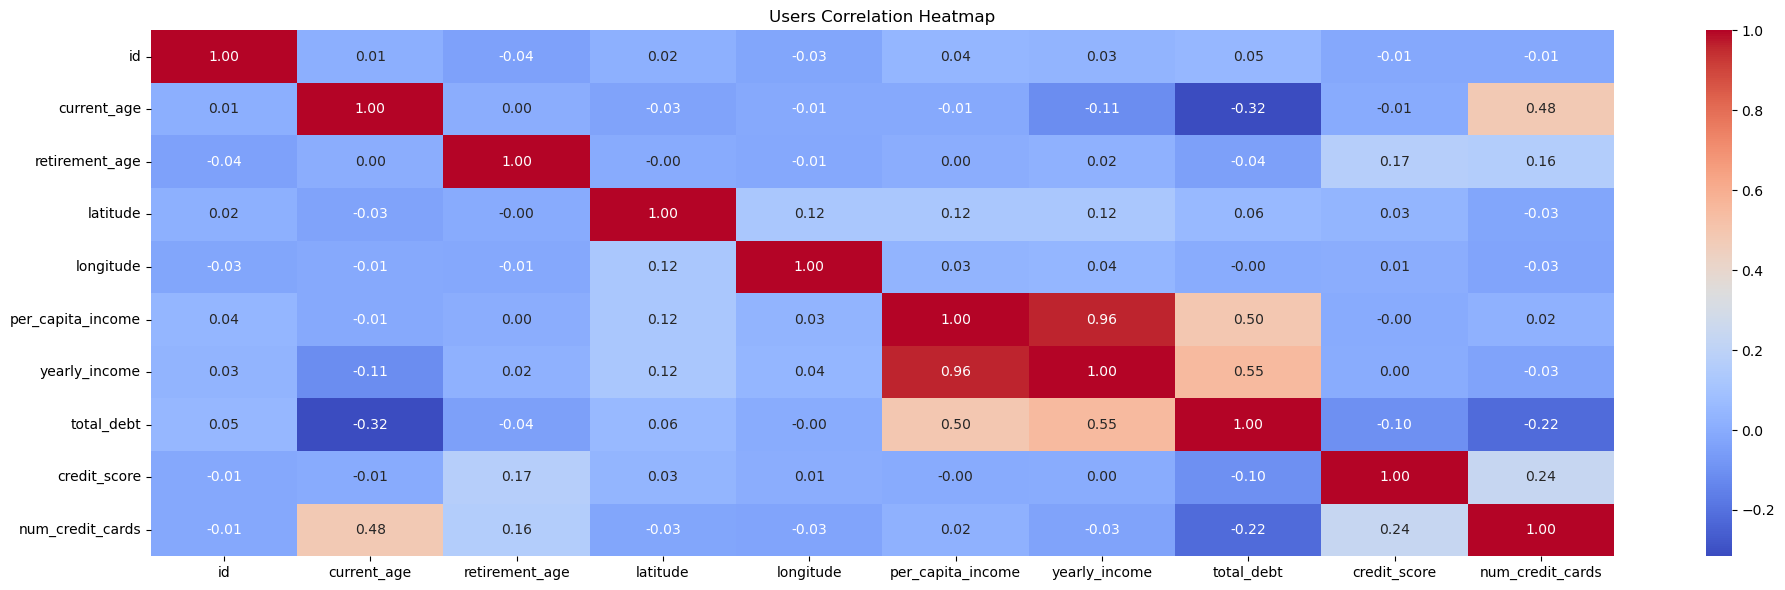

In [65]:
# Users Heatmap of correlation
num_df = users_df.select_dtypes(include='number')
corr = num_df.corr()
plt.figure(figsize=(20, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Users Correlation Heatmap')
plt.tight_layout()
plt.show()

<h4><b>Box Plots</h4>

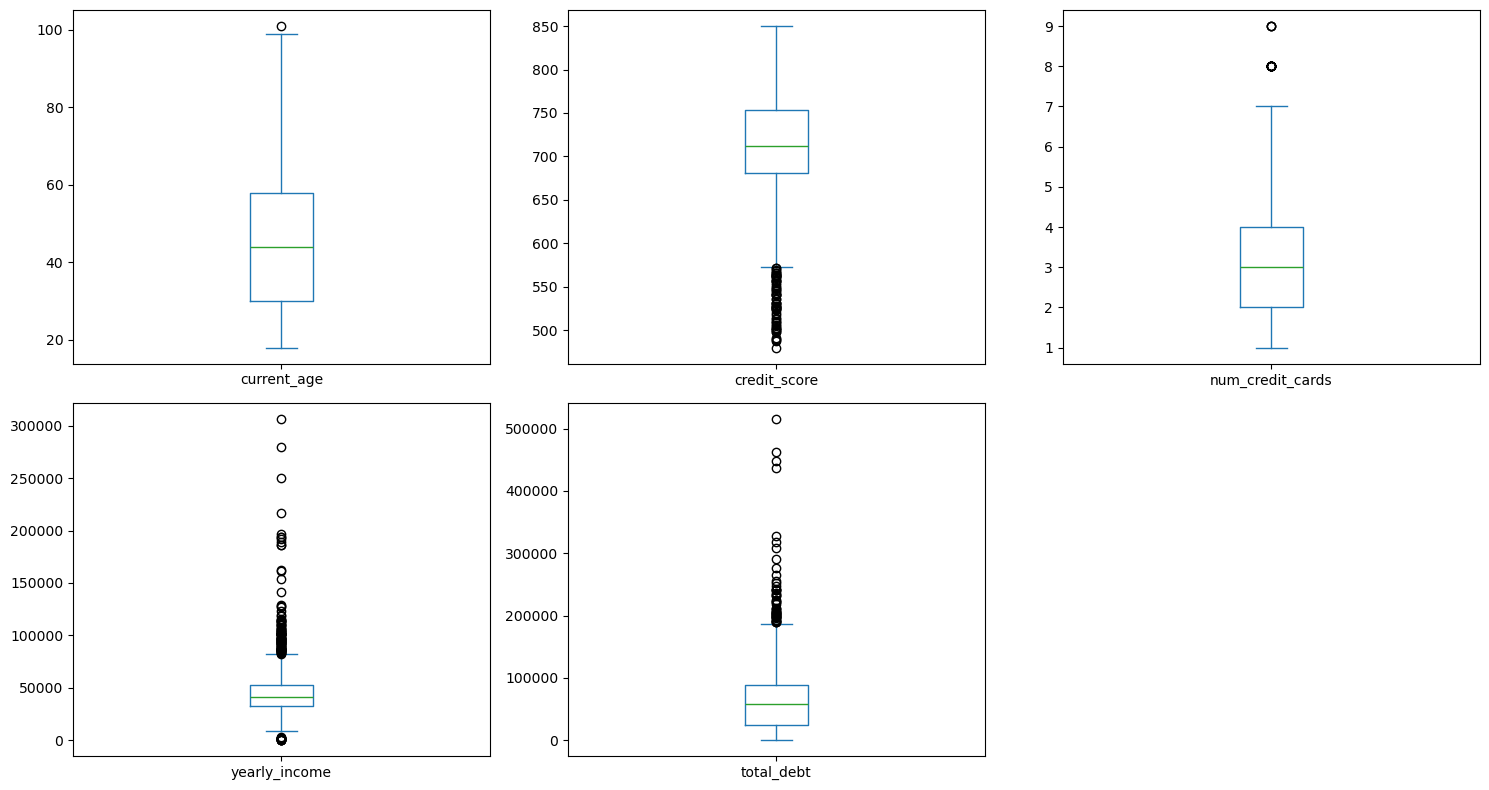

In [67]:
cols = ['current_age','credit_score','num_credit_cards','yearly_income','total_debt']
users_df[cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(15,8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

<h4><b>Retirement Readiness & Targeting</h4>
Identify customers near retirement to market financial planning products.

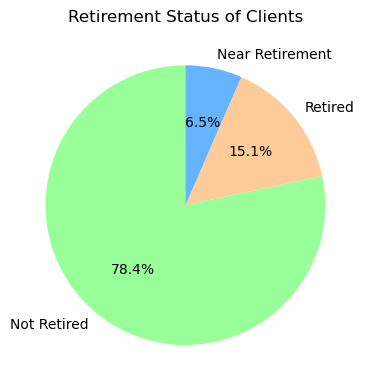

In [69]:
# Years left until retirement
users_df['years_to_retire'] = users_df['retirement_age'] - users_df['current_age']

# Classify Retirement
def classify_retirement(row):
    if row['current_age'] >= row['retirement_age']:
        return 'Retired'
    elif row['years_to_retire'] <= 5:
        return 'Near Retirement'
    else:
        return 'Not Retired'

users_df['retirement_status'] = users_df.apply(classify_retirement, axis=1)

# Plot 
plt.figure(figsize=(4,4))
users_df['retirement_status'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['#99ff99','#ffcc99','#66b3ff'], startangle=90)

plt.title('Retirement Status of Clients')
plt.ylabel('')
plt.tight_layout()
plt.show()

<h4><b>Regional Analysis Using Latitude & Longitude</h4>
Identify profitable or risky geographic areas.

In [71]:
# Simple quadrant segmentation
users_df['region'] = users_df.apply(
    lambda row: 
    'North' if row['latitude'] >= users_df['latitude'].median() and row['longitude'] < users_df['longitude'].median() else
    'South' if row['latitude'] < users_df['latitude'].median() and row['longitude'] < users_df['longitude'].median() else
    'East' if row['latitude'] >= users_df['latitude'].median() and row['longitude'] >= users_df['longitude'].median() else
    'West',
    axis=1
)

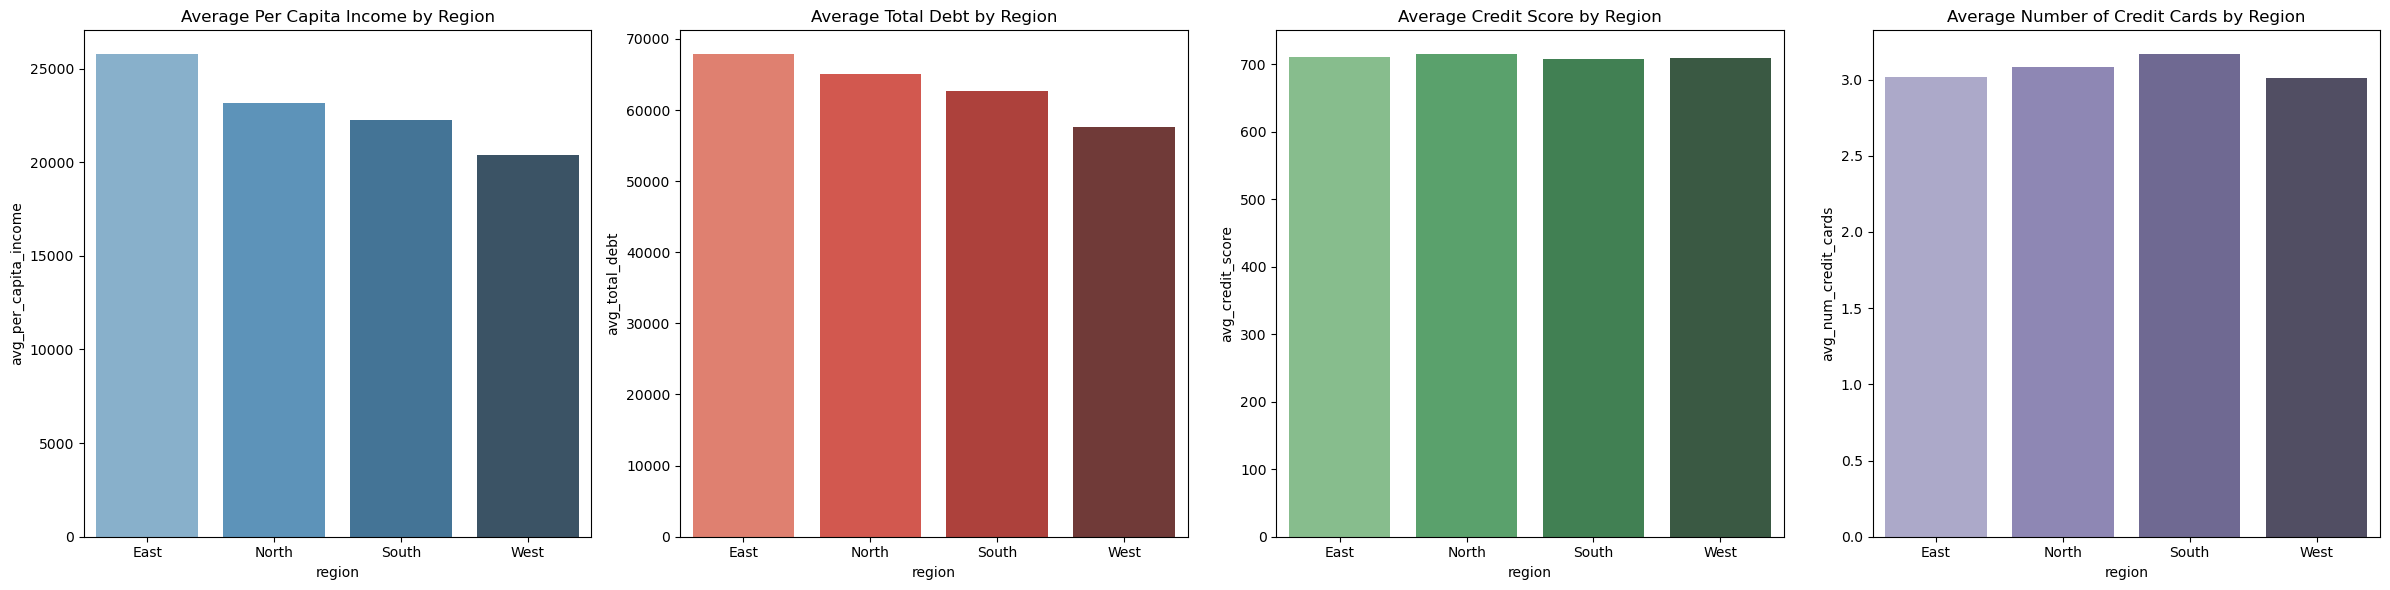

In [72]:
# Group by region to compute averages
region_summary = users_df.groupby('region').agg({
    'per_capita_income': 'mean',
    'total_debt': 'mean',
    'credit_score': 'mean',
    'num_credit_cards': 'mean'
}).reset_index()

region_summary.rename(columns={
    'per_capita_income': 'avg_per_capita_income',
    'total_debt': 'avg_total_debt',
    'credit_score': 'avg_credit_score',
    'num_credit_cards': 'avg_num_credit_cards'
}, inplace=True)

# Create 1 row × 4 columns of subplots
fig, axes = plt.subplots(1, 4, figsize=(24, 6))  # wider figure

sns.barplot(x='region', y='avg_per_capita_income', data=region_summary, ax=axes[0], palette='Blues_d')
axes[0].set_title('Average Per Capita Income by Region')

sns.barplot(x='region', y='avg_total_debt', data=region_summary, ax=axes[1], palette='Reds_d')
axes[1].set_title('Average Total Debt by Region')

sns.barplot(x='region', y='avg_credit_score', data=region_summary, ax=axes[2], palette='Greens_d')
axes[2].set_title('Average Credit Score by Region')

sns.barplot(x='region', y='avg_num_credit_cards', data=region_summary, ax=axes[3], palette='Purples_d')
axes[3].set_title('Average Number of Credit Cards by Region')

plt.tight_layout()
plt.show()

In [73]:
import plotly.express as px

fig = px.scatter_mapbox(
    users_df,
    lat="latitude",
    lon="longitude",
    color="region",
    hover_name="id",  
    zoom=3,             
    height=600,
    width=900
)

fig.update_layout(
    mapbox_style="open-street-map",
    title="Customer Locations by Region"
)

fig.show()


<h4><b>Credit Risk Profiling</h4>
Detect high-risk customers for credit products or limit increases.

In [75]:
users_df['debt_to_income_ratio'] = users_df['total_debt'] / users_df['yearly_income']

# Segment customers
risk_segments = pd.cut(users_df['credit_score'], 
                       bins=[300,580,670,740,800,850],
                       labels=['Poor','Fair','Good','Very Good','Excellent'])

users_df['credit_segment'] = risk_segments

<h4><b>Income Segmentation</h4>
Design premium products for high earners and budget solutions for low earners.

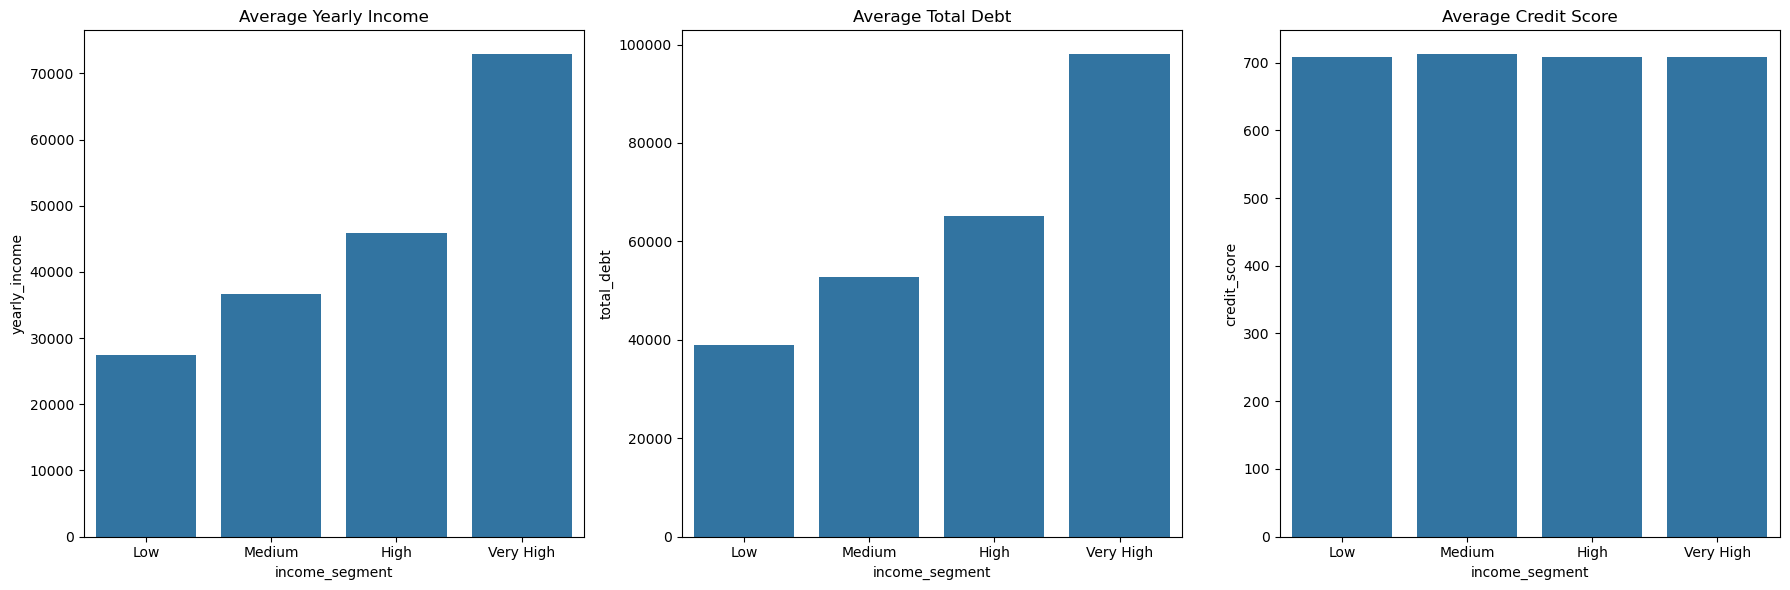

In [77]:
# Segment by per_capita_income
income_segments = pd.qcut(users_df['per_capita_income'], q=4, labels=['Low','Medium','High','Very High'])
users_df['income_segment'] = income_segments

income_summary = users_df.groupby('income_segment')[['yearly_income','total_debt','credit_score']].mean().reset_index()

fig, axes = plt.subplots(1,3, figsize=(18,6))

sns.barplot(x='income_segment', y='yearly_income', data=income_summary, ax=axes[0])
axes[0].set_title('Average Yearly Income')

sns.barplot(x='income_segment', y='total_debt', data=income_summary, ax=axes[1])
axes[1].set_title('Average Total Debt')

sns.barplot(x='income_segment', y='credit_score', data=income_summary, ax=axes[2])
axes[2].set_title('Average Credit Score')

plt.tight_layout()
plt.show()

<h4><b>Number of Credit Cards vs Income vs Credit Score</h4>
Shows which clients have high spending capacity but low credit scores

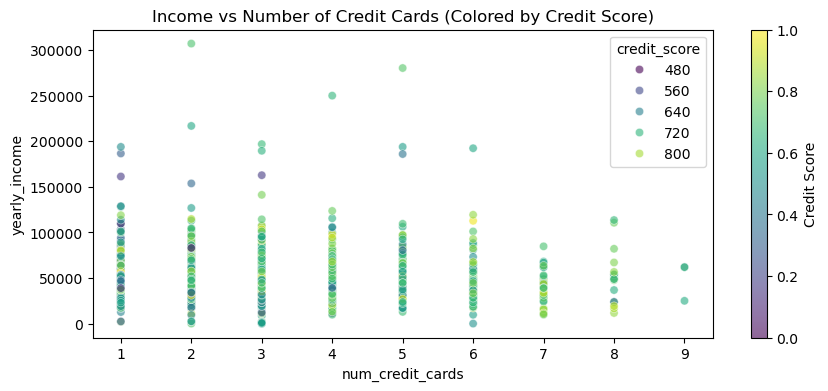

In [79]:
plt.figure(figsize=(10,4))
scatter = sns.scatterplot(
    x='num_credit_cards', 
    y='yearly_income',
    hue='credit_score',
    palette='viridis',
    data=users_df, 
    alpha=0.6
)

plt.title('Income vs Number of Credit Cards (Colored by Credit Score)')
plt.colorbar(scatter.collections[0], label='Credit Score')
plt.show()


<h4><b>Debt-to-Income Ratio vs. Credit Score & Retirement Age</h4>
Shows whether people nearing retirement are financially stressed (high debt but low credit score).

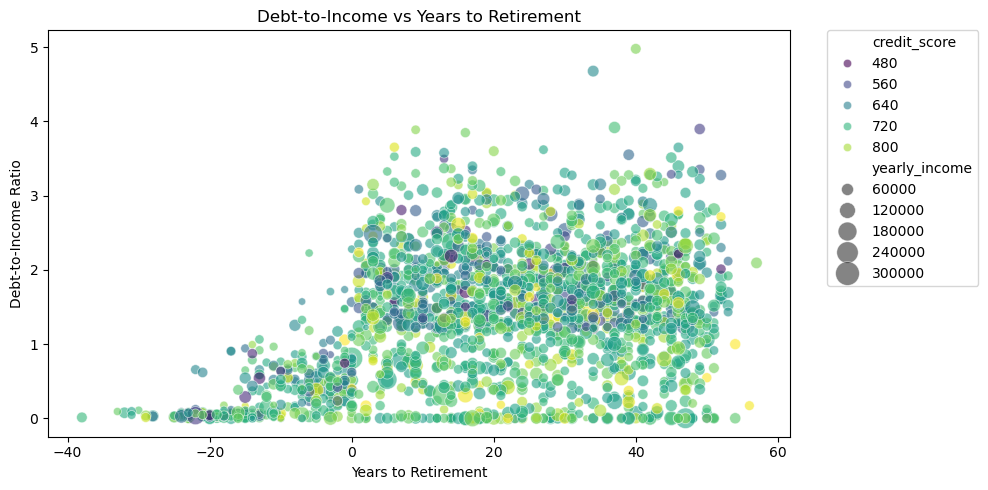

In [81]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    x='years_to_retire',
    y='debt_to_income_ratio',
    hue='credit_score',
    size='yearly_income',
    sizes=(20, 300),   
    palette='viridis',   
    alpha=0.6,            
    data=users_df
)

plt.title('Debt-to-Income vs Years to Retirement')
plt.xlabel('Years to Retirement')
plt.ylabel('Debt-to-Income Ratio')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  
plt.tight_layout()
plt.show()


<h4><b>Debt by Credit Score Bands</h4>

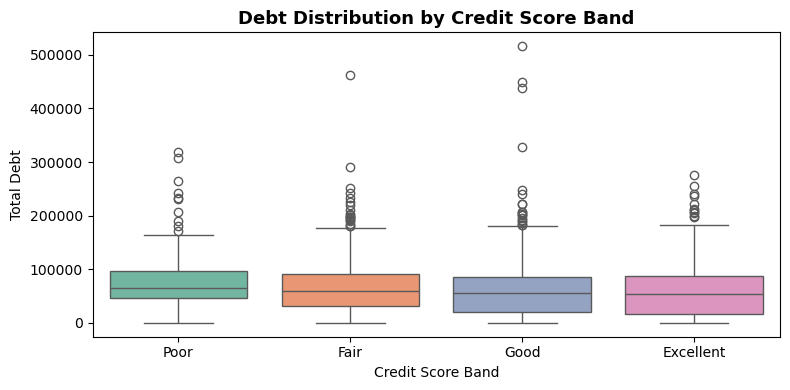

In [83]:
bins = [0,600,700,750,850]
labels = ['Poor','Fair','Good','Excellent']
users_df['score_band'] = pd.cut(users_df['credit_score'], bins=bins, labels=labels)

plt.figure(figsize=(8,4))
sns.boxplot(x='score_band', y='total_debt', data=users_df, palette='Set2')
plt.title('Debt Distribution by Credit Score Band', fontsize=13, weight='bold')
plt.xlabel('Credit Score Band'); plt.ylabel('Total Debt')
plt.tight_layout()
plt.show()

<h4><b>PCI vs Yearly Income Scatter</h4>

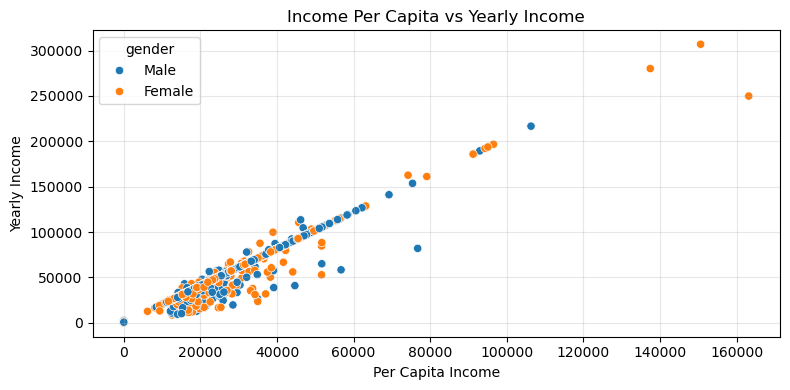

In [85]:
# PCI vs Yearly Income Scatter
plt.figure(figsize=(8,4))
sns.scatterplot(x='per_capita_income', y='yearly_income', data=users_df, hue='gender')
plt.title('Income Per Capita vs Yearly Income')
plt.xlabel('Per Capita Income')
plt.ylabel('Yearly Income')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [86]:
# Age Group
bins = [17, 24, 34, 44, 54, 64, 120] 
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

users_df['age_group'] = pd.cut(users_df['current_age'], bins=bins, labels=labels)

In [87]:
# Income Group
bins = [0, 30000, 60000, 100000, 200000, users_df['yearly_income'].max()]
labels = ['Low', 'Lower-Middle', 'Upper-Middle', 'High', 'Very High']

users_df['income_group'] = pd.cut(users_df['yearly_income'], bins=bins, labels=labels)

<h4><b>Transactions Data</h4>

<h4><b>Heatmap of correlation</h4>

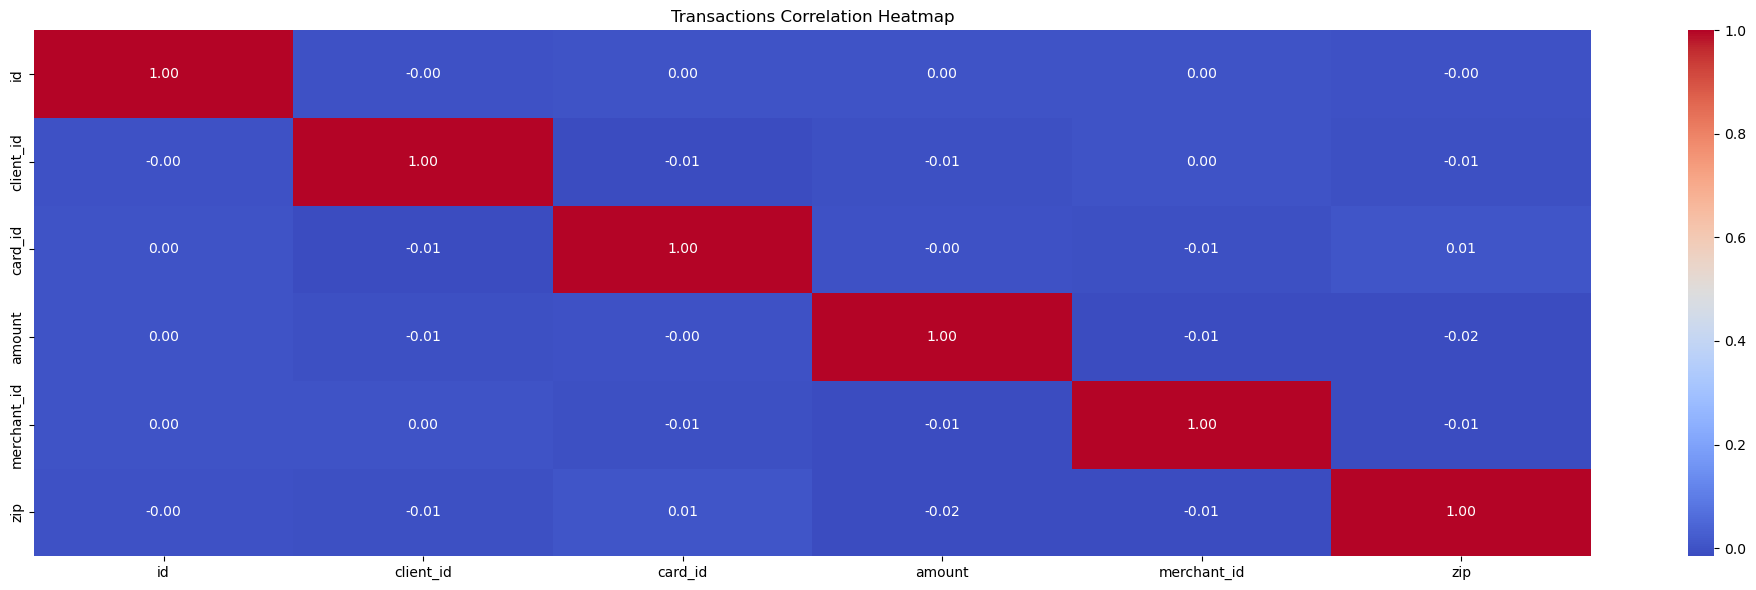

In [90]:
num_df = transactions_df.select_dtypes(include='number')
corr = num_df.corr()
plt.figure(figsize=(20, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Transactions Correlation Heatmap')
plt.tight_layout()
plt.show()

<h4><b>Box Plot Transactions Amount</h4>

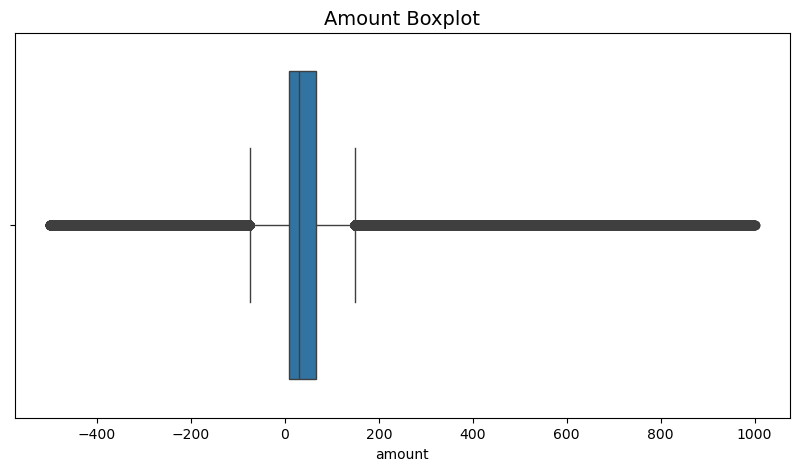

In [92]:
plt.figure(figsize=(10,5))
sns.boxplot(x=transactions_df['amount'])
plt.title('Amount Boxplot', fontsize=14)
plt.show()

<h4><b>Use Chip Distribution</h4>

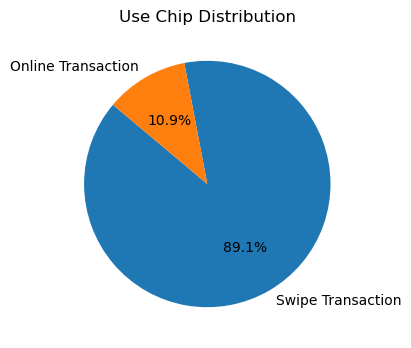

In [94]:
use_chip_counts = transactions_df['use_chip'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(use_chip_counts, labels=use_chip_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Use Chip Distribution')
plt.show()

<h4><b>Trend Analysis</h4>

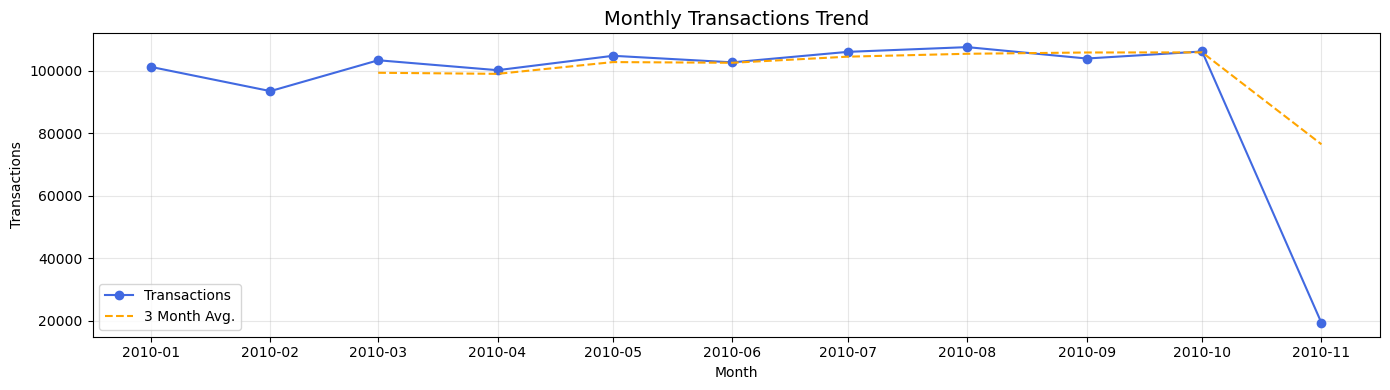

In [96]:
transactions_df['month'] = transactions_df['date'].dt.to_period('M').dt.to_timestamp()
monthly = transactions_df.groupby('month').size()

plt.figure(figsize=(14,4))
plt.plot(monthly.index, monthly.values, marker='o', color='royalblue', label='Transactions')
plt.plot(monthly.index, monthly.rolling(3).mean(), color='orange', linestyle='--', label='3 Month Avg.')
plt.title('Monthly Transactions Trend', fontsize=14)
plt.xlabel('Month'); plt.ylabel('Transactions'); plt.grid(alpha=0.3); plt.legend()
plt.tight_layout(); plt.show()

<h4><b>Customer Activity Rate (Active Clients)</h4>

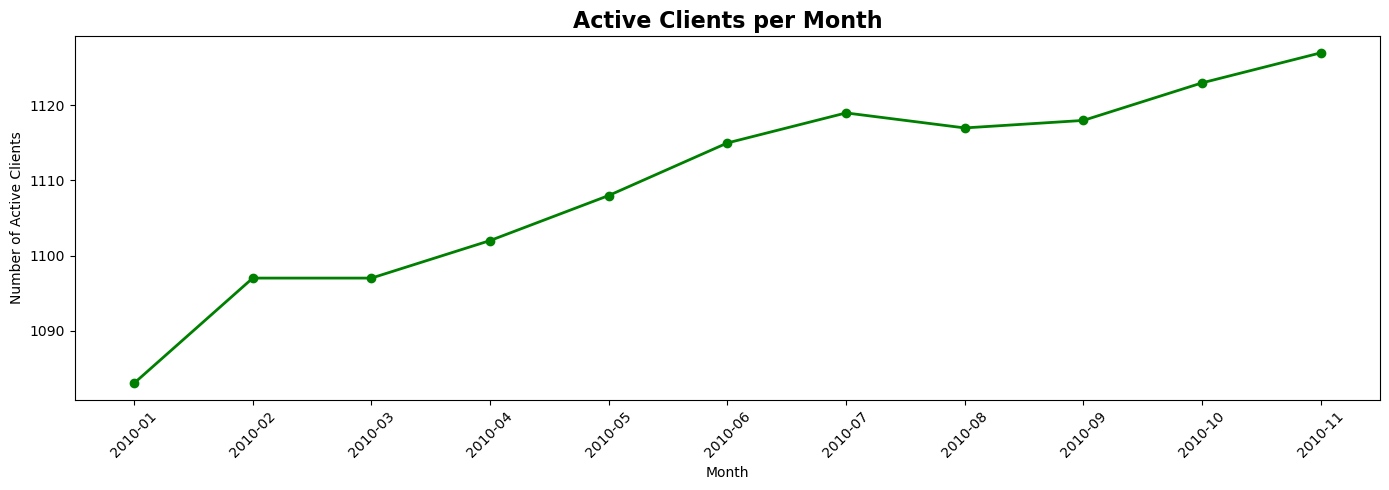

In [98]:
transactions_df['month'] = transactions_df['date'].dt.to_period('M')  
# Group by month to count unique clients
active_clients = transactions_df.groupby('month')['client_id'].nunique()

# Plot
plt.figure(figsize=(14,5))
plt.plot(active_clients.index.astype(str), active_clients.values, 
         marker='o', color='green', linewidth=2)
plt.title('Active Clients per Month', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Active Clients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h4><b>Average Ticket Size (ATS) (average spend per transaction over time)</h4>

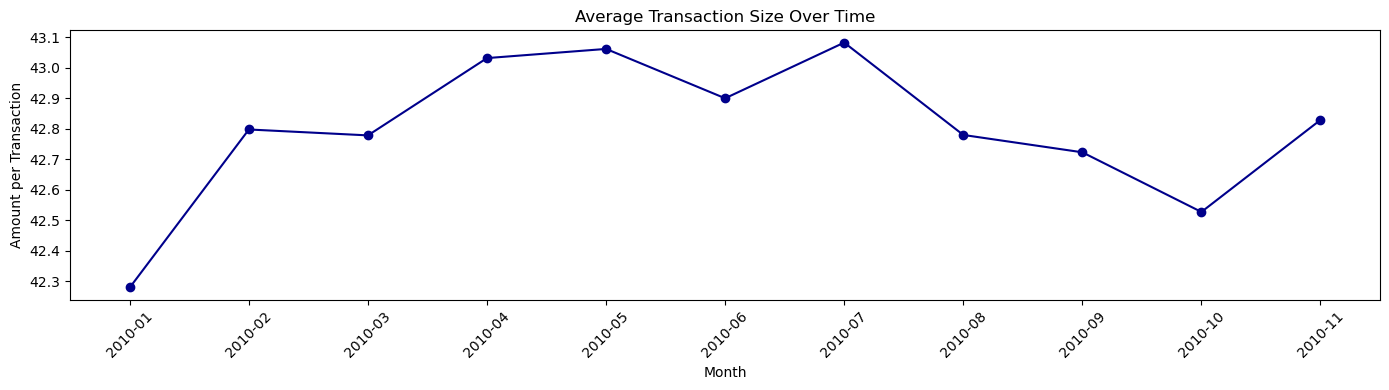

In [227]:
monthly_amount = transactions_df.groupby('month')['amount'].sum()
monthly_count  = transactions_df.groupby('month').size()
ats = monthly_amount / monthly_count

plt.figure(figsize=(14,4))
plt.plot(ats.index.astype(str), 
         ats.values, marker='o', color='darkblue')
plt.title('Average Transaction Size Over Time')
plt.ylabel('Amount per Transaction')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h4><b>Transactions Heatmap by Day and Hour</h4>

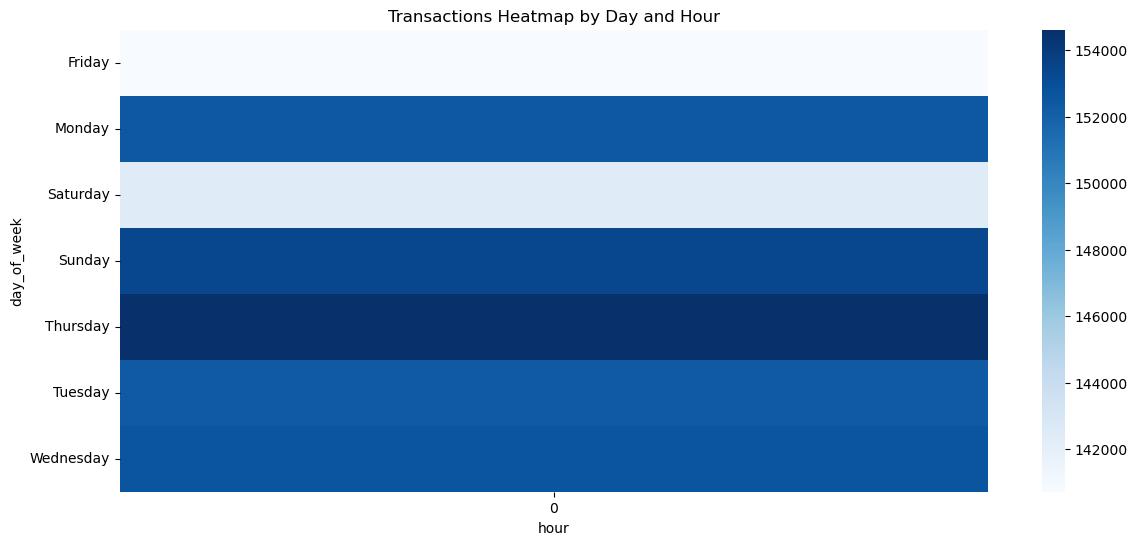

In [230]:
transactions_df['day_of_week'] = transactions_df['date'].dt.day_name()
transactions_df['hour'] = transactions_df['date'].dt.hour

heatmap_data = transactions_df.groupby(['day_of_week','hour']).size().unstack(fill_value=0)

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap='Blues')
plt.title('Transactions Heatmap by Day and Hour')
plt.show()

<h4><b>Top 5 Cities and States</h4>

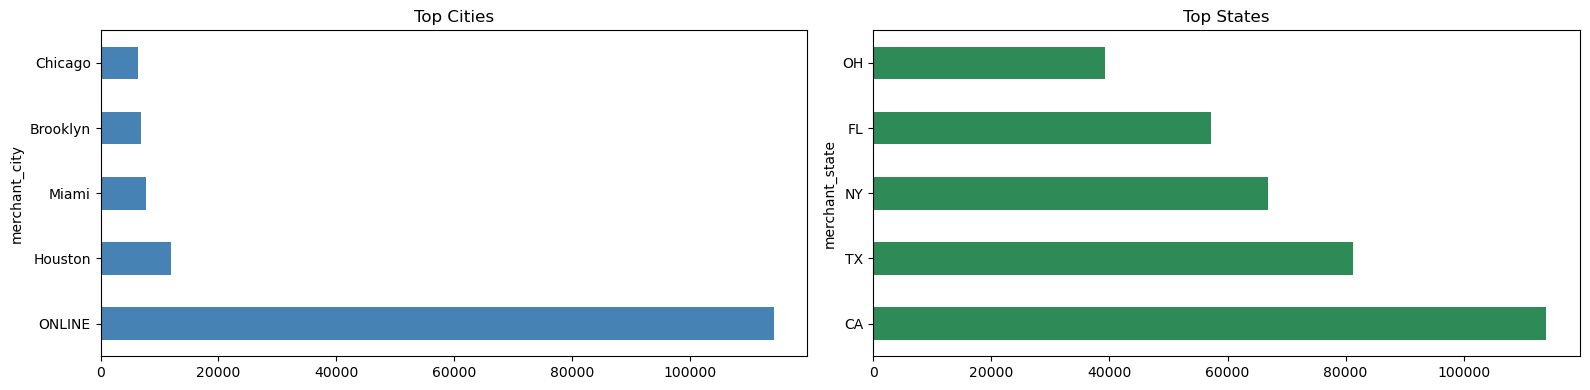

In [233]:
fig,ax=plt.subplots(1,2,figsize=(16,4))
transactions_df['merchant_city'].value_counts().head().plot(kind='barh',ax=ax[0],color='steelblue',title='Top Cities')
transactions_df['merchant_state'].value_counts().head().plot(kind='barh',ax=ax[1],color='seagreen',title='Top States')
plt.tight_layout();plt.show()

<h4><b>Amount vs MCC</h4>

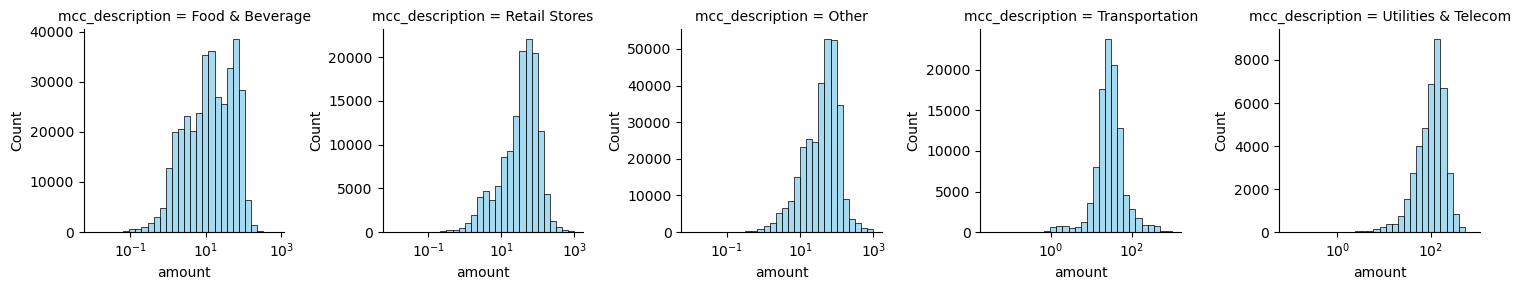

In [238]:
top_mcc = transactions_df['mcc_description'].value_counts().head().index.tolist()

g = sns.FacetGrid(
    transactions_df[transactions_df['mcc_description'].isin(top_mcc)],
    col='mcc_description', col_wrap=5, height=3, sharex=False, sharey=False
)
g.map(sns.histplot, 'amount', log_scale=True, bins=30, color='skyblue')
plt.tight_layout()
plt.show()

<h4><b>Cards Data</h4>

<h4><b>Heatmap of correlation</h4>

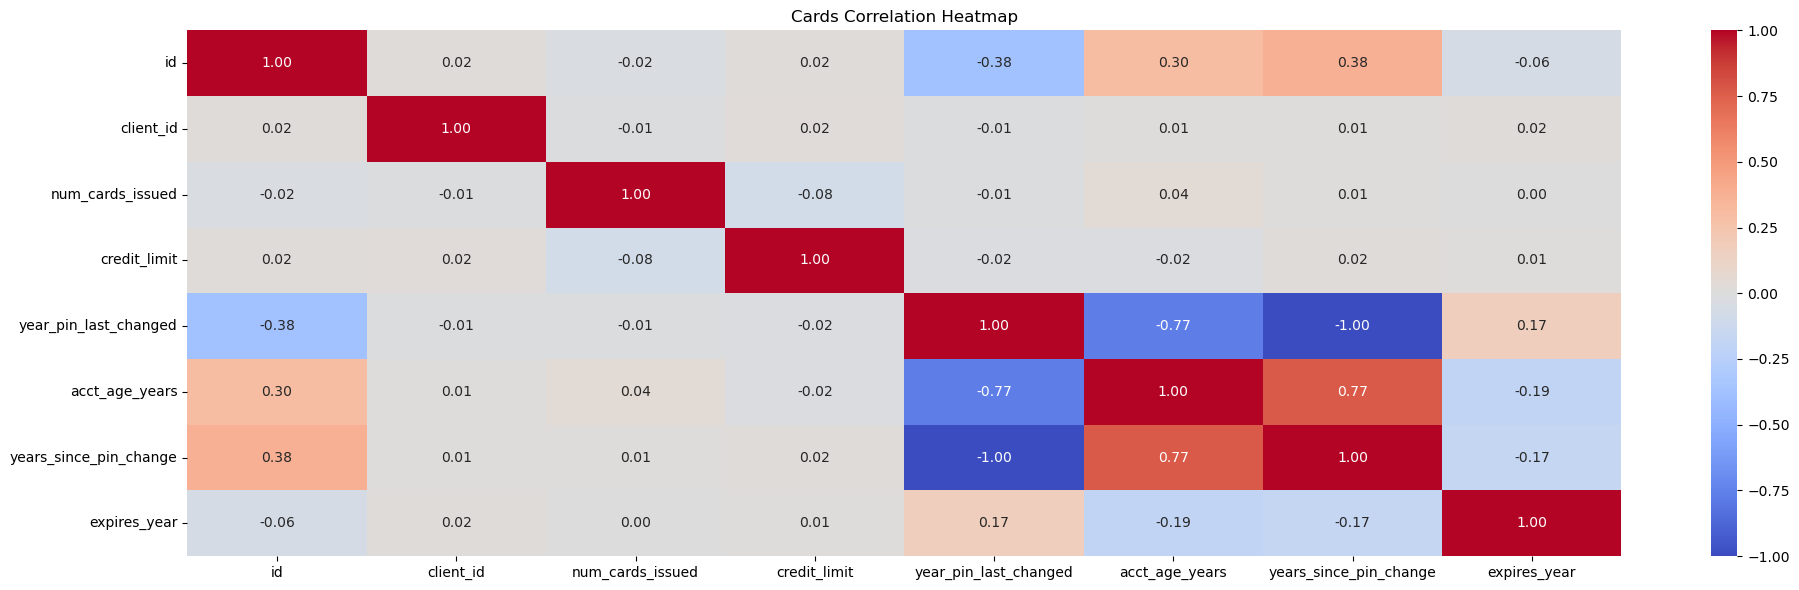

In [242]:
num_df = cards_df.select_dtypes(include='number')
corr = num_df.corr()
plt.figure(figsize=(20, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Cards Correlation Heatmap')
plt.tight_layout()
plt.show()

<h4><b>Card Brand & Type Distribution</h4>

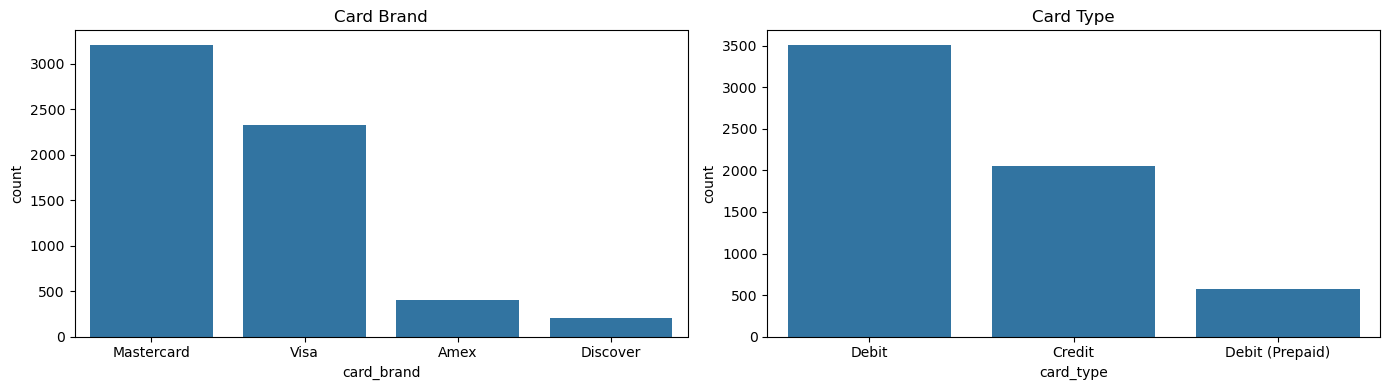

In [245]:
fig,ax=plt.subplots(1,2,figsize=(14,4))
sns.countplot(x='card_brand',data=cards_df,
              order=cards_df['card_brand'].value_counts().index,ax=ax[0])
ax[0].set_title('Card Brand')

sns.countplot(x='card_type',data=cards_df,
              order=cards_df['card_type'].value_counts().index,ax=ax[1])
ax[1].set_title('Card Type')

plt.tight_layout()
plt.show()

<h4><b>Average Credit Limit by Card Type / Brand</h4>

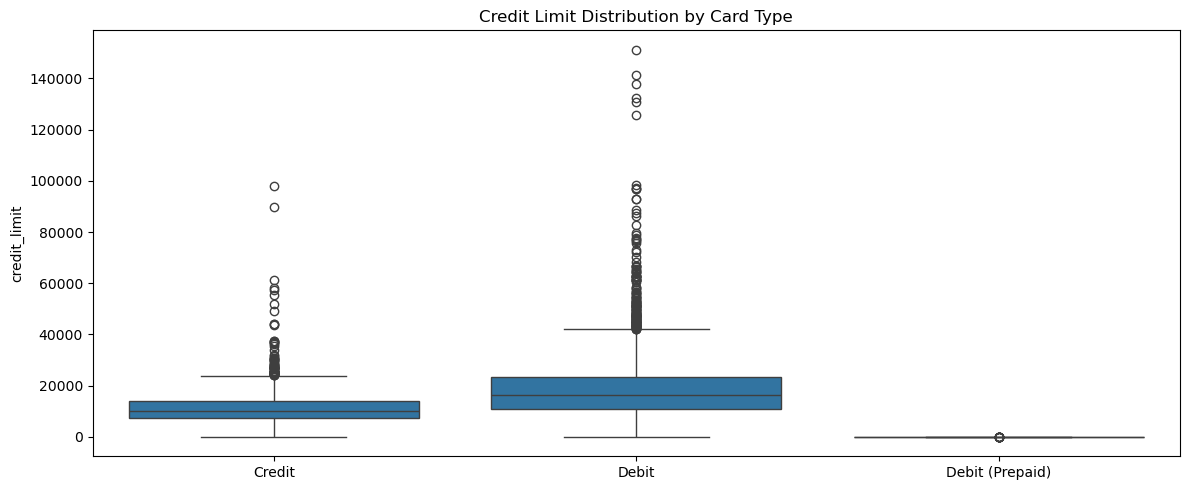

In [248]:
plt.figure(figsize=(12,5))
sns.boxplot(x='card_type', y='credit_limit', data=cards_df)
plt.title('Credit Limit Distribution by Card Type')
plt.xlabel('')
plt.tight_layout()
plt.show()

<h4><b>Customer Age with the Bank</h4>

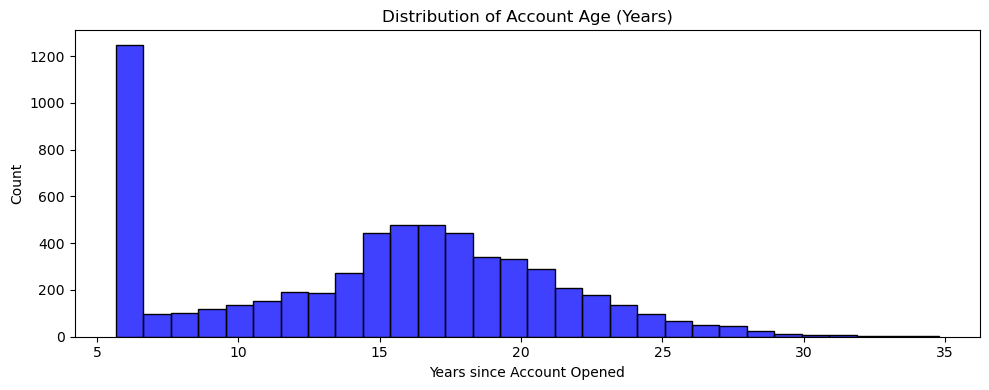

In [251]:
cards_df['acct_age_years'] = (pd.Timestamp.today() - cards_df['acct_open_date']).dt.days/365

plt.figure(figsize=(10,4))
sns.histplot(cards_df['acct_age_years'], bins=30, color='blue')
plt.title('Distribution of Account Age (Years)')
plt.xlabel('Years since Account Opened')
plt.tight_layout()
plt.show()

<h4><b>PIN Security Hygiene (Find customers who haven’t changed their PIN recently)</h4>

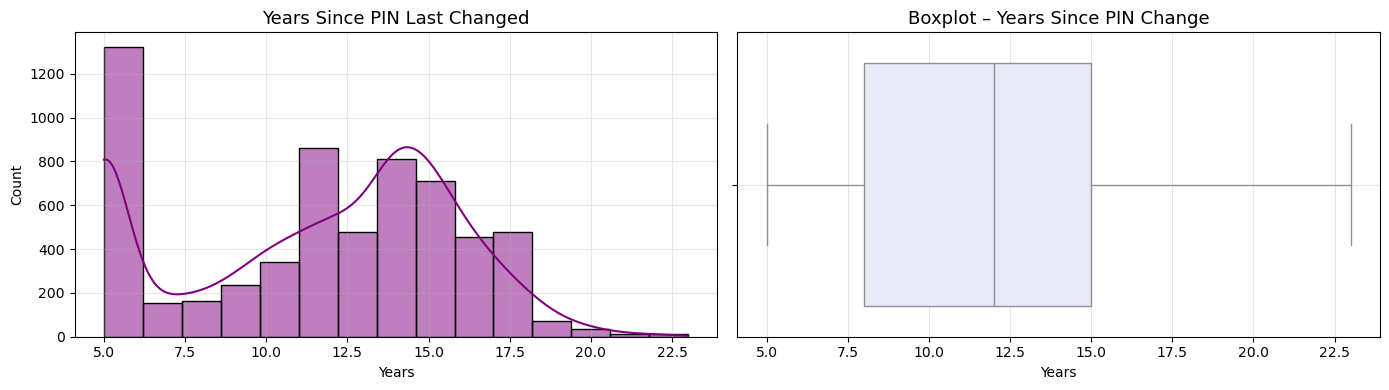

In [254]:
recent_year = pd.Timestamp.today().year
cards_df['years_since_pin_change'] = recent_year - cards_df['year_pin_last_changed']

fig, ax = plt.subplots(1,2,figsize=(14,4))

# KDE + histogram
sns.histplot(cards_df['years_since_pin_change'], bins=15, kde=True, color='purple', ax=ax[0])
ax[0].set_title('Years Since PIN Last Changed', fontsize=13)
ax[0].set_xlabel('Years')
ax[0].grid(alpha=0.3)

# Boxplot for quick outlier view
sns.boxplot(x=cards_df['years_since_pin_change'], color='lavender', ax=ax[1])
ax[1].set_title('Boxplot – Years Since PIN Change', fontsize=13)
ax[1].set_xlabel('Years')
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

<h4><b>Cards Per Customer</h4>

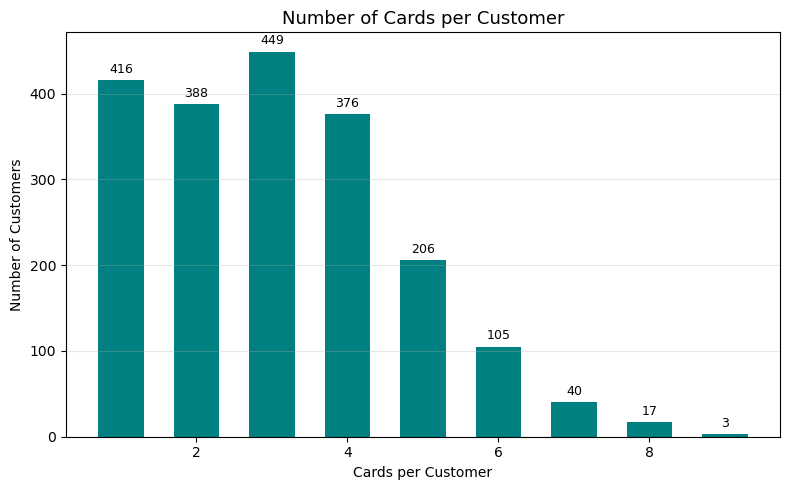

In [257]:
cards_per_client = cards_df.groupby('client_id')['num_cards_issued'].count()
cards_count = cards_per_client.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(cards_count.index, cards_count.values, color='teal', width=0.6)
ax.set_title('Number of Cards per Customer', fontsize=13)
ax.set_xlabel('Cards per Customer')
ax.set_ylabel('Number of Customers')
ax.grid(axis='y', alpha=0.3)

for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()+5,
            f"{bar.get_height()}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

<h4><b>Expiring Cards</h4>

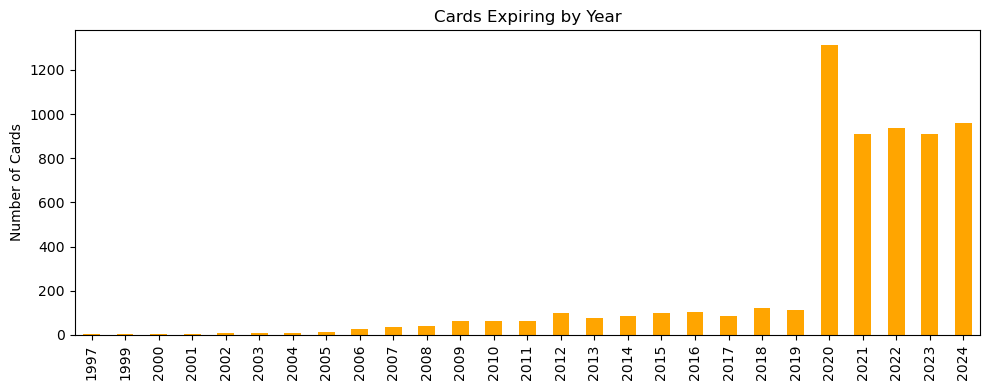

In [260]:
cards_df['expires_year'] = cards_df['expires'].dt.year
expiring = cards_df['expires_year'].value_counts().sort_index()

expiring.plot(kind='bar', figsize=(10,4), color='orange')
plt.title('Cards Expiring by Year')
plt.xlabel(''); plt.ylabel('Number of Cards')
plt.tight_layout()
plt.show()

<h4><b>Fraud Analysis</b></h4>

In [263]:
fraud_rate = transactions_df['fraud_label'].value_counts(normalize=True) * 100
print(fraud_rate)

fraud_label
No     99.786949
Yes     0.213051
Name: proportion, dtype: float64


<h4><b>Fraud by Transaction Amount</h4>

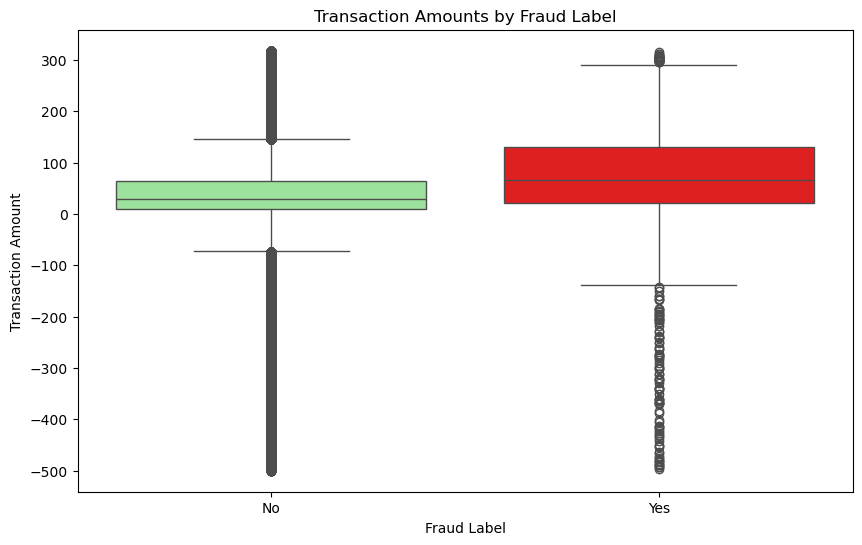

In [266]:
plt.figure(figsize=(10,6))
sns.boxplot(x='fraud_label', y='amount', data=transactions_df[transactions_df['amount'] < transactions_df['amount'].quantile(0.99)], palette=['lightgreen','red'])
plt.title('Transaction Amounts by Fraud Label')
plt.xlabel('Fraud Label')
plt.ylabel('Transaction Amount')
plt.show()

<h4><b>Fraud by Merchant City / State</h4>

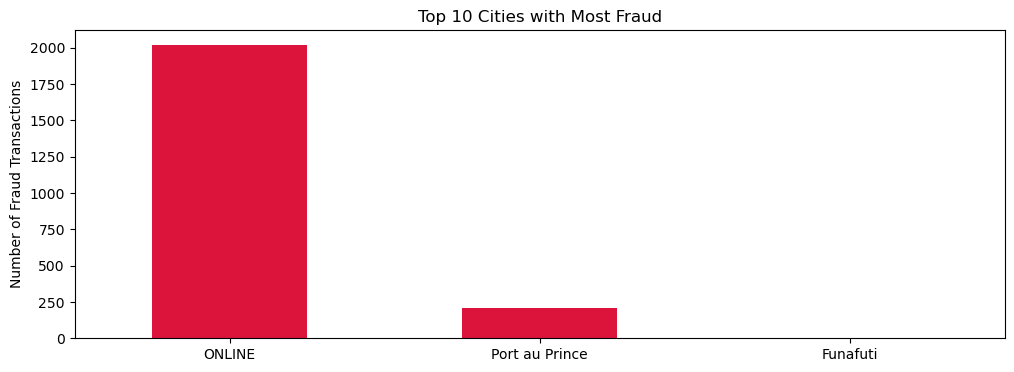

In [269]:
fraud_by_city = transactions_df[transactions_df['fraud_label']=='Yes']['merchant_city'].value_counts().head()

plt.figure(figsize=(12,4))
fraud_by_city.plot(kind='bar', color='crimson')
plt.title('Top 10 Cities with Most Fraud')
plt.xlabel('')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=0)
plt.show()

<h4><b>Fraud by Merchant Category (MCC)</h4>

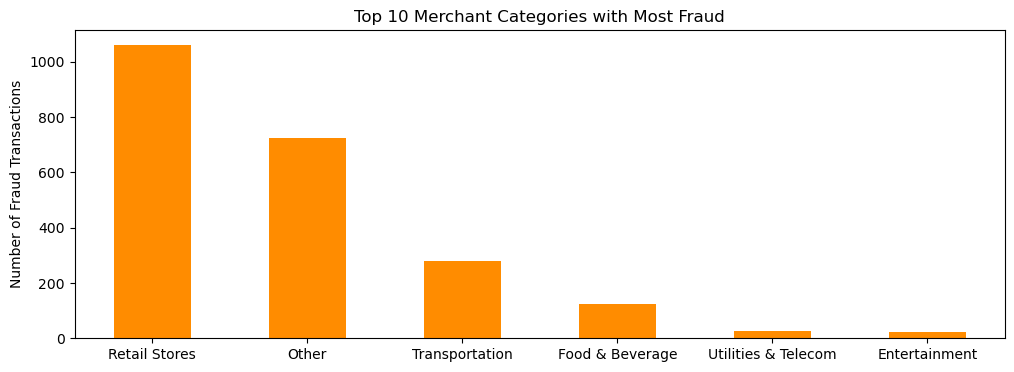

In [272]:
fraud_by_mcc = transactions_df[transactions_df['fraud_label']=='Yes']['mcc_description'].value_counts().head(6)

plt.figure(figsize=(12,4))
fraud_by_mcc.plot(kind='bar', color='darkorange')
plt.title('Top 10 Merchant Categories with Most Fraud')
plt.xlabel('')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=0)
plt.show()

<h4><b>Fraud Amount Loss Estimation</h4>

In [275]:
fraud_loss = transactions_df.loc[transactions_df['fraud_label']=='Yes','amount'].sum()
total_loss = transactions_df['amount'].sum()

print(f"💰 Total Fraud Loss: ${fraud_loss:,.2f}")
print(f"⚠️ Fraud Loss Percentage: {fraud_loss/total_loss*100:.2f}%")

💰 Total Fraud Loss: $208,753.48
⚠️ Fraud Loss Percentage: 0.47%


<h4><b>Top 10 Clients Involved in Fraud (by count)</h4>

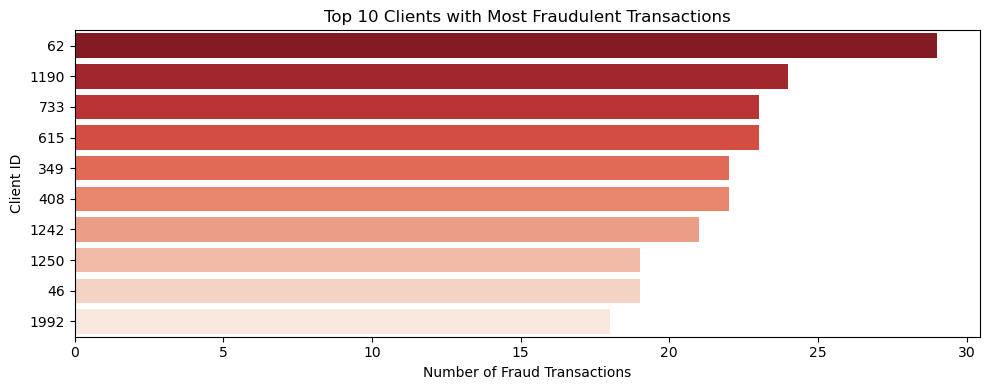

In [278]:
fraud_clients = (transactions_df[transactions_df['fraud_label'] == 'Yes']['client_id'].value_counts().head(10))

plt.figure(figsize=(10,4))
sns.barplot(
    x=fraud_clients.values,
    y=fraud_clients.index.astype(str),
    palette='Reds_r'
)
plt.title('Top 10 Clients with Most Fraudulent Transactions')
plt.xlabel('Number of Fraud Transactions')
plt.ylabel('Client ID')
plt.tight_layout()
plt.show()

<h4><b>Top 10 Merchants Involved in Fraud (by count)</h4>

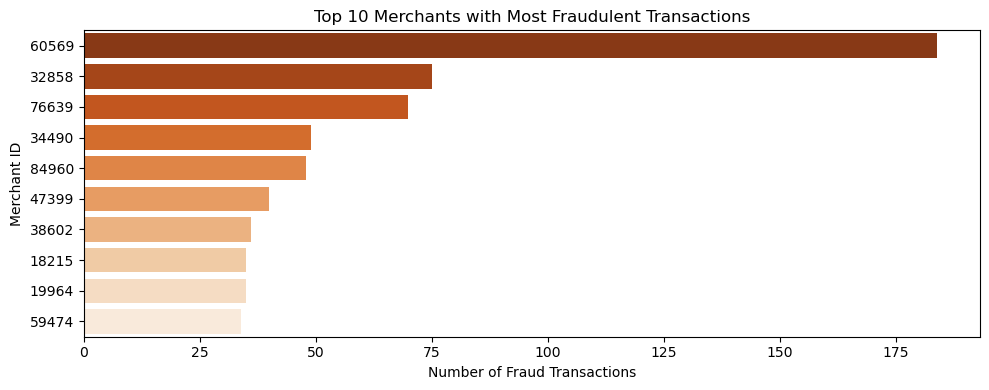

In [281]:
fraud_merchants = (transactions_df[transactions_df['fraud_label'] == 'Yes']['merchant_id'].value_counts().head(10))

plt.figure(figsize=(10,4))
sns.barplot(
    x=fraud_merchants.values,
    y=fraud_merchants.index.astype(str),
    palette='Oranges_r'
)
plt.title('Top 10 Merchants with Most Fraudulent Transactions')
plt.xlabel('Number of Fraud Transactions')
plt.ylabel('Merchant ID')
plt.tight_layout()
plt.show()

In [288]:
# Download the files 
users_df.to_csv('users_df.csv', index=False)
transactions_df.to_csv('transactions_df.csv', index=False)
cards_df.to_csv('cards_df.csv', index=False)